In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [31]:
!wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/latest/face_landmarker.task

## Visualization utilities

In [43]:
#@markdown We implemented some functions to visualize the face landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision


def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())

  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

## Test detection results on test image

In [44]:
def show_detection_result(img_path):
    # STEP 2: Create an FaceLandmarker object.
    base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
    options = vision.FaceLandmarkerOptions(base_options=base_options,
                                        output_face_blendshapes=True,
                                        output_facial_transformation_matrixes=True,
                                        num_faces=1)
    detector = vision.FaceLandmarker.create_from_options(options)

    # STEP 3: Load the input image.
    image = mp.Image.create_from_file(img_path)

    # STEP 4: Detect face landmarks from the input image.
    detection_result = detector.detect(image)

    # STEP 5: Process the detection result. In this case, visualize it.
    annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
    plt.imshow(annotated_image)
    plt.show()
    return detection_result

In [45]:
import cv2
import sys
import matplotlib.pyplot as plt   

I0000 00:00:1702460381.236342  797893 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1702460381.295692 1208818 gl_context.cc:344] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 545.23.08), renderer: NVIDIA GeForce RTX 2080/PCIe/SSE2
W0000 00:00:1702460381.295992  797893 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.


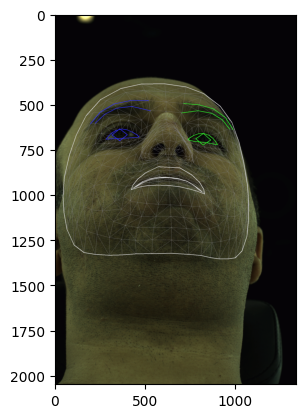

In [48]:
IMAGE_PATH = 'datasets/multiface/minidataset/m--20180227--0000--6795937--GHS/images/E057_Cheeks_Puffed/400031/021909.png'
res = show_detection_result(IMAGE_PATH)

I0000 00:00:1702456949.289767  797893 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1702456949.383696 1180994 gl_context.cc:344] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 545.23.08), renderer: NVIDIA GeForce RTX 2080/PCIe/SSE2
W0000 00:00:1702456949.383967  797893 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.


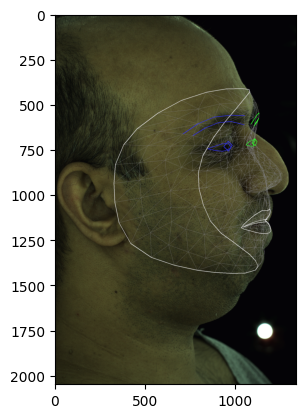

In [46]:
IMAGE_PATH = 'datasets/multiface/minidataset/m--20180227--0000--6795937--GHS/images/E057_Cheeks_Puffed/400059/021909.png'
res = show_detection_result(IMAGE_PATH)

I0000 00:00:1702409043.522012  797893 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1702409043.561513  878889 gl_context.cc:344] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 545.23.08), renderer: NVIDIA GeForce RTX 2080/PCIe/SSE2
W0000 00:00:1702409043.561813  797893 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.


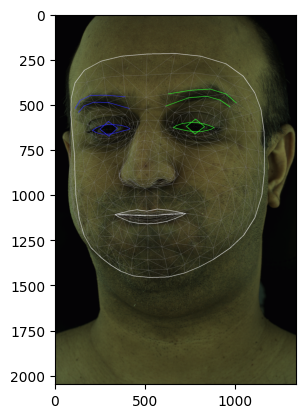

In [35]:
IMAGE_PATH = 'datasets/multiface/minidataset/m--20180227--0000--6795937--GHS/images/E057_Cheeks_Puffed/400016/021909.png'
res = show_detection_result(IMAGE_PATH)

In [36]:
res

FaceLandmarkerResult(face_landmarks=[[NormalizedLandmark(x=0.3811461627483368, y=0.5327557921409607, z=-0.10588639974594116, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.3585667014122009, y=0.4478132128715515, z=-0.19215461611747742, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.37377429008483887, y=0.47092580795288086, z=-0.1058310940861702, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.3377159833908081, y=0.36903589963912964, z=-0.13117073476314545, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.35658249258995056, y=0.4228648543357849, z=-0.20276634395122528, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.3606320321559906, y=0.3909938633441925, z=-0.18664531409740448, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.3761051893234253, y=0.3155149519443512, z=-0.0842452198266983, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.1671690046787262, y=0.31887173652648926, z=0.11620984226465225, visibility=0.0, presence=0.0), NormalizedLandma

In [37]:
res.face_landmarks[0][0].z

-0.10588639974594116

I0000 00:00:1702409084.885570  797893 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1702409084.944402  878960 gl_context.cc:344] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 545.23.08), renderer: NVIDIA GeForce RTX 2080/PCIe/SSE2
W0000 00:00:1702409084.944648  797893 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.


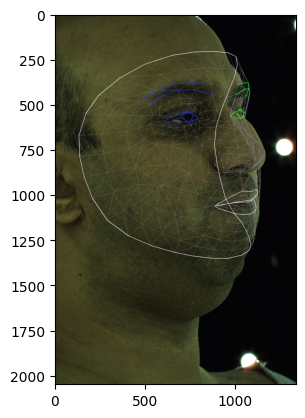

FaceLandmarkerResult(face_landmarks=[[NormalizedLandmark(x=0.8137161135673523, y=0.48014262318611145, z=-0.08057159185409546, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.8556509017944336, y=0.39153334498405457, z=-0.12308299541473389, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.8005819320678711, y=0.4227369427680969, z=-0.07165372371673584, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.7732570171356201, y=0.3293590843677521, z=-0.10718236863613129, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.8533922433853149, y=0.3691434860229492, z=-0.12825939059257507, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.826096773147583, y=0.3448900282382965, z=-0.11578752845525742, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.7412786483764648, y=0.28408998250961304, z=-0.0443018339574337, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.47353604435920715, y=0.2909274697303772, z=-0.12744411826133728, visibility=0.0, presence=0.0), NormalizedLandma

In [38]:
IMAGE_PATH = 'datasets/multiface/minidataset/m--20180227--0000--6795937--GHS/images/E057_Cheeks_Puffed/400018/021939.png'
show_detection_result(IMAGE_PATH)

I0000 00:00:1702409089.727718  797893 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1702409089.793268  878974 gl_context.cc:344] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 545.23.08), renderer: NVIDIA GeForce RTX 2080/PCIe/SSE2
W0000 00:00:1702409089.793516  797893 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.


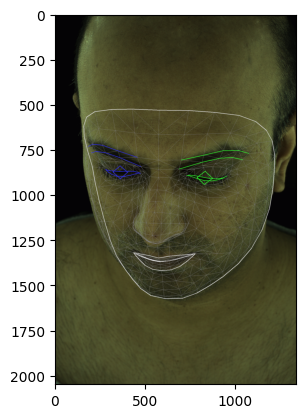

FaceLandmarkerResult(face_landmarks=[[NormalizedLandmark(x=0.43086695671081543, y=0.659491777420044, z=-0.007663425989449024, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.40707212686538696, y=0.6154707670211792, z=-0.14747397601604462, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4225233495235443, y=0.6192625761032104, z=-0.046354006975889206, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.3867775797843933, y=0.5351525545120239, z=-0.15406259894371033, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.40429720282554626, y=0.5983502864837646, z=-0.17120905220508575, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.40748488903045654, y=0.5661115646362305, z=-0.17961537837982178, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4242156147956848, y=0.474712997674942, z=-0.16109947860240936, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.22153973579406738, y=0.4271089732646942, z=-0.006620540749281645, visibility=0.0, presence=0.0), NormalizedLa

In [39]:
IMAGE_PATH = 'datasets/multiface/minidataset/m--20180227--0000--6795937--GHS/images/E057_Cheeks_Puffed/400041/022026.png'
show_detection_result(IMAGE_PATH)

I0000 00:00:1702317110.841258  566573 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1702317110.932396  568677 gl_context.cc:344] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 545.23.08), renderer: NVIDIA GeForce RTX 2080/PCIe/SSE2
W0000 00:00:1702317110.932699  566573 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.


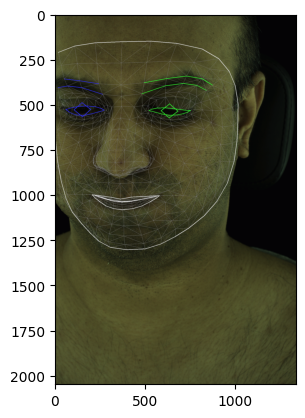

In [14]:
IMAGE_PATH = 'datasets/multiface/minidataset/m--20180227--0000--6795937--GHS/images/E057_Cheeks_Puffed/400002/021897.png'
show_detection_result(IMAGE_PATH)

In [1]:
all_expressions = [
        "E001_Neutral_Eyes_Open",
        "E002_Swallow",
        "E003_Neutral_Eyes_Closed",
        "E004_Relaxed_Mouth_Open",
        "E005_Eyes_Wide_Open",
        "E006_Jaw_Drop_Brows_Up",
        "E007_Neck_Stretch_Brows_Up",
        "E008_Smile_Mouth_Closed",
        "E009_Smile_Mouth_Open",
        "E010_Smile_Stretched",
        "E011_Jaw_Open_Sharp_Corner_Lip_Stretch",
        "E012_Jaw_Open_Huge_Smile",
        "E013_Open_Lips_Mouth_Stretch_Nose_Wrinkled",
        "E014_Open_Mouth_Stretch_Nose_Wrinkled",
        "E015_Jaw_Open_Upper_Lip_Raised",
        "E016_Raise_Upper_Lip_Scrunch_Nose",
        "E017_Jaw_Open_Mouth_Corners_Down_Nose_Wrinkled",
        "E018_Raise_Cheeks",
        "E019_Frown",
        "E020_Lower_Eyebrows",
        "E021_Pressed_Lips_Brows_Down",
        "E022_Raise_Inner_Eyebrows",
        "E023_Hide_Lips_Look_Up",
        "E024_Kiss_Lips_Look_Down",
        "E025_Shh",
        "E026_Oooo",
        "E027_Scrunch_Face_Squeeze_Eyes",
        "E028_Scream_Eyebrows_Up",
        "E029_Show_All_Teeth",
        "E030_Open_Mouth_Wide_Tongue_Up_And_Back",
        "E031_Jaw_Open_Lips_Together",
        "E032_Jaw_Open_Pull_Lips_In",
        "E033_Jaw_Clench",
        "E034_Jaw_Open_Lips_Pushed_Out",
        "E035_Lips_Together_Pushed_Forward",
        "E036_Stick_Lower_Lip_Out",
        "E037_Bite_Lower_Lip",
        "E038_Bite_Upper_Lip",
        "E039_Lips_Open_Right",
        "E040_Lips_Open_Left",
        "E041_Mouth_Nose_Right",
        "E042_Mouth_Nose_Left",
        "E043_Mouth_Open_Jaw_Right_Show_Teeth",
        "E044_Mouth_Open_Jaw_Left_Show_Teeth",
        "E045_Jaw_Back",
        "E046_Jaw_Forward",
        "E047_Tongue_Over_Upper_Lip",
        "E048_Tongue_Out_Lips_Closed",
        "E049_Mouth_Open_Tongue_Out",
        "E050_Bite_Tongue",
        "E051_Tongue_Out_Flat",
        "E052_Tongue_Out_Thick",
        "E053_Tongue_Out_Rolled",
        "E054_Tongue_Out_Right_Teeth_Showing",
        "E055_Tongue_Out_Left_Teeth_Showing",
        "E056_Suck_Cheeks_In",
        "E057_Cheeks_Puffed",
        "E058_Right_Cheek_Puffed",
        "E059_Left_Cheek_Puffed",
        "E060_Blow_Cheeks_Full_Of_Air",
        "E061_Lips_Puffed",
        "E062_Nostrils_Dilated",
        "E063_Nostrils_Sucked_In",
        "E064_Raise_Right_Eyebrow",
        "E065_Raise_Left_Eyebrow",
        "E074_Blink",
        "EXP_ROM07_Facial_Expressions",
        "GAZ_G1_Regular",
        "GAZ_G2_Wide_eyes",
        "GAZ_G3_Squint_Partial",
        "GAZ_G4_Head_movement_Partial",
        "GAZ_G4_Head_movement_Partial",
        "GAZ_g001",
        "GAZ_g002",
        "GAZ_g003",
        "GAZ_g004",
        "GAZ_g005",
        "GAZ_g006",
        "GAZ_g007",
        "GAZ_g008",
        "GAZ_g009",
        "GAZ_g010",
        "SEN_a_good_morrow_to_you_my_boy",
        "SEN_a_voice_spoke_near-at-hand",
        "SEN_alfalfa_is_healthy_for_you",
        "SEN_all_your_wishful_thinking_wont_change_that",
        "SEN_allow_each_child_to_have_an_ice_pop",
        "SEN_and_you_think_you_have_language_problems",
        "SEN_approach_your_interview_with_statuesque_composure",
        "SEN_are_you_looking_for_employment",
        "SEN_as_she_drove_she_thought_about_her_plan",
        "SEN_both_figures_would_go_higher_in_later_years",
        "SEN_boy_youre_stirrin_early_a_sleepy_voice_said",
        "SEN_by_eating_yogurt_you_may_live_longer",
        "SEN_cliff_was_soothed_by_the_luxurious_massage",
        "SEN_did_Shawn_catch_that_big_goose_without_help",
        "SEN_do_they_make_class_biased_decisions",
        "SEN_drop_five_forms_in_the_box_before_you_go_out",
        "SEN_george_is_paranoid_about_a_future_gas_shortage",
        "SEN_go_change_your_shoes_before_you_turn_around",
        "SEN_greg_buys_fresh_milk_each_weekday_morning",
        "SEN_have_you_got_our_keys_handy",
        "SEN_how_do_oysters_make_pearls",
        "SEN_how_long_would_it_be_occupied",
        "SEN_how_ya_gonna_keep_em_down_on_the_farm",
        "SEN_however_a_boys_lively_eyes_might_rove",
        "SEN_id_rather_not_buy_these_shoes_than_be_overcharged",
        "SEN_if_dark_came_they_would_lose_her",
        "SEN_im_going_to_search_this_house",
        "SEN_its_healthier_to_cook_without_sugar",
        "SEN_jeffs_toy_go_cart_never_worked",
        "SEN_more_he_could_take_at_leisure",
        "SEN_nobody_else_showed_pleasure",
        "SEN_oh_we_managed_she_said",
        "SEN_she_always_jokes_about_too_much_garlic_in_his_food",
        "SEN_take_charge_of_choosing_her_bridesmaids_gowns",
        "SEN_thank_you_she_said_dusting_herself_off",
        "SEN_the_small_boy_put_the_worm_on_the_hook",
        "SEN_then_he_thought_me_more_perverse_than_ever",
        "SEN_they_all_like_long_hot_showers",
        "SEN_they_are_both_trend_following_methods",
        "SEN_they_enjoy_it_when_I_audition",
        "SEN_they_had_slapped_their_thighs",
        "SEN_they_werent_as_well_paid_as_they_should_have_been",
        "SEN_theyre_going_to_louse_me_up_good",
        "SEN_theyve_never_met_you_know",
        "SEN_when_she_awoke_she_was_the_ship",
        "SEN_why_buy_oil_when_you_always_use_mine",
        "SEN_why_charge_money_for_such_garbage",
        "SEN_why_put_such_a_high_value_on_being_top_dog",
        "SEN_with_each_song_he_gave_verbal_footnotes",
        "SEN_youre_boiling_milk_aint_you",
        "EXP_cheek001",
        "EXP_cheek002",
        "EXP_eyebrow",
        "EXP_eye_neutral",
        "EXP_eyes_blink_light_medium_hard_wink",
        "EXP_eyes_closed_mouth_open_peak",
        "EXP_eye_squint",
        "EXP_eye_wide",
        "EXP_free_face",
        "EXP_jaw001",
        "EXP_jaw002",
        "EXP_jaw003",
        "EXP_jaw004",
        "EXP_jaw005",
        "EXP_jaw006",
        "EXP_lip001",
        "EXP_lip002",
        "EXP_lip003",
        "EXP_neutral_peak",
        "EXP_nose001",
        "EXP_tongue001",
        "EXP_tongue002"
    ]
len(all_expressions)

154

In [2]:
file_name = "images--SEN_alfalfa_is_healthy_for_you_cam400026.tar"
file_name.split('.')[0][-6:]

'400026'

In [11]:
import requests
from bs4 import BeautifulSoup
import logging
root = "https://fb-baas-f32eacb9-8abb-11eb-b2b8-4857dd089e15.s3.amazonaws.com/MugsyDataRelease/v0.0/identities/"
e = "6795937"
url = root + e + "/index.html"
entity = url.split("/")[-2]
reqs = requests.get(url)
soup = BeautifulSoup(reqs.text, "html.parser")
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("Dataset Download")
for link in soup.find_all("a"):
    file_name = link.get("href").split("/")[-1]
    if "images" not in file_name:
        continue
    elif file_name.split('.')[0][-6:] not in ["400015", "400016"]:
        continue
    break

In [12]:
file_name

'images--E002_Swallow_cam400015.tar'